<a href="https://colab.research.google.com/github/alouvre/BPDS_DicodingSubmission_Proyek_Pertama_Dashboard_HR/blob/main/BPDS_Submission_Proyek_Pertama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama : Menyelesaikan Permasalahan departemen Human Resources (HR) di Perusahaan Jaya Maju

- Nama: Alifia Mustika Sari
- Email: alifiamustika02@gmail.com
- ID Dicoding:

## Business Understanding

### Latar Belakang

Jaya Jaya Maju adalah perusahaan multinasional yang telah beroperasi sejak tahun 2000 dengan lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. Meskipun telah menjadi perusahaan besar, Jaya Jaya Maju masih menghadapi tantangan serius dalam pengelolaan karyawan. Salah satu indikator utama dari permasalahan ini adalah tingginya tingkat attrition rate (rasio karyawan yang keluar terhadap total karyawan), yang mencapai lebih dari 10%.

Tingginya angka ini dikhawatirkan akan berdampak pada produktivitas, efisiensi operasional, dan stabilitas perusahaan dalam jangka panjang. Oleh karena itu, manajemen HR ingin mengidentifikasi faktor-faktor utama yang memengaruhi tingginya tingkat pergantian karyawan dan membuat sistem pemantauan yang efektif.

### Permasalahan Bisnis

Bagaimana Jaya Jaya Maju dapat mengurangi tingkat pergantian karyawan yang tinggi untuk meningkatkan produktivitas, efisiensi operasional, dan stabilitas bisnisnya di masa depan?

Pertanyaan utama ini dapat diuraikan menjadi beberapa sub-masalah:
- Apa faktor-faktor utama yang menyebabkan tingginya tingkat attrition di Jaya Jaya Maju?
- Bagaimana kepuasan kerja, keseimbangan kehidupan kerja, pengembangan karir, dan budaya organisasi saat ini mempengaruhi keputusan karyawan untuk tetap atau keluar dari perusahaan?
- Strategi apa yang dapat diterapkan oleh manajemen untuk meningkatkan retensi dan kepuasan karyawan?
- Bagaimana model machine learning dapat membantu memprediksi risiko karyawan keluar dari perusahaan secara dini?

### Tujuan Proyek

- Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap tingginya attrition rate.
- Menyediakan alat bantu visual berupa dashboard interaktif untuk membantu HR memantau tren dan distribusi data karyawan.
- Mengembangkan model prediktif yang dapat membantu perusahaan dalam pengambilan keputusan strategis terkait retensi karyawan.

### Cakupan Proyek

Untuk menjawab permasalahan di atas, proyek ini memiliki dua fokus utama:

- Pembuatan Business Dashboard

    Dashboard ini akan digunakan untuk memantau berbagai faktor yang memengaruhi tingginya attrition rate karyawan berdasarkan data historis. Visualisasi akan mencakup metrik-metrik penting seperti distribusi usia, tingkat kepuasan kerja, kebiasaan lembur, hingga distribusi berdasarkan departemen atau jabatan.

- Pengembangan Model Machine Learning

    Proyek ini juga mencakup pembuatan model machine learning yang mampu memprediksi kemungkinan seorang karyawan akan keluar dari perusahaan (attrition prediction). Model ini bertujuan untuk membantu tim HR mengidentifikasi karyawan yang berisiko tinggi keluar lebih awal, sehingga intervensi atau strategi retensi dapat dilakukan secara proaktif. Untuk itu, akan disusun skrip Python sederhana sebagai bagian dari proses prediksi ini.

## **1. Persiapan Proyek**

### Menyiapkan Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
import os
import shutil

### Menyiapkan Gdrive Proyek

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/BPDS/Proyek_Pertama'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/BPDS/Proyek_Pertama


### Menyiapkan dan Memuat Dataset

In [ ]:
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
df_employee = pd.read_csv(url)

print("Jumlah data karyawan:", len(df_employee.EmployeeId))

Jumlah data karyawan: 1470


In [ ]:
df_employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## **2. Data Understanding**

### Karakteristik Dataset

| Kolom                        | Deskripsi                                                                                    |
| ---------------------------- | -------------------------------------------------------------------------------------------- |
| **EmployeeId**               | ID unik untuk setiap karyawan.                                                               |
| **Attrition**                | Status keluar dari perusahaan (0 = Tidak keluar, 1 = Keluar)                                 |
| **Age**                      | Umur karyawan.                                                                               |
| **BusinessTravel**           | Frekuensi perjalanan dinas.                                                                  |
| **DailyRate**                | Gaji harian.                                                                                 |
| **Department**               | Departemen tempat karyawan bekerja.                                                          |
| **DistanceFromHome**         | Jarak dari rumah ke kantor (dalam km).                                                       |
| **Education**                | Tingkat pendidikan (1 = Di bawah kuliah, 2 = Kuliah, 3 = S1, 4 = S2, 5 = S3)              |
| **EducationField**           | Bidang studi pendidikan terakhir.                                                            |
| **EnvironmentSatisfaction**  | Kepuasan terhadap lingkungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)   |
| **Gender**                   | Jenis kelamin karyawan.                                                                      |
| **HourlyRate**               | Gaji per jam.                                                                                |
| **JobInvolvement**           | Tingkat keterlibatan dalam pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi) |
| **JobLevel**                 | Level pekerjaan (1 hingga 5).                                                                |
| **JobRole**                  | Jabatan atau peran pekerjaan.                                                                |
| **JobSatisfaction**          | Kepuasan terhadap pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)          |
| **MaritalStatus**            | Status pernikahan.                                                                           |
| **MonthlyIncome**            | Gaji bulanan.                                                                                |
| **MonthlyRate**              | Tarif bulanan (mungkin nilai kompensasi tambahan).                                           |
| **NumCompaniesWorked**       | Jumlah perusahaan tempat karyawan pernah bekerja.                                            |
| **Over18**                   | Apakah usia karyawan di atas 18 tahun?                                                       |
| **OverTime**                 | Apakah karyawan sering lembur?                                                               |
| **PercentSalaryHike**        | Persentase kenaikan gaji tahun lalu.                                                         |
| **PerformanceRating**        | Penilaian kinerja (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)                   |
| **RelationshipSatisfaction** | Kepuasan terhadap hubungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)     |
| **StandardHours**            | Jumlah jam kerja standar (biasanya tetap).                                                   |
| **StockOptionLevel**         | Level opsi saham yang dimiliki.                                                              |
| **TotalWorkingYears**        | Total tahun pengalaman kerja.                                                                |
| **TrainingTimesLastYear**    | Jumlah pelatihan yang diikuti tahun lalu.                                                    |
| **WorkLifeBalance**          | Keseimbangan kerja dan kehidupan (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)     |
| **YearsAtCompany**           | Lama bekerja di perusahaan saat ini.                                                         |
| **YearsInCurrentRole**       | Lama bekerja di posisi saat ini.                                                             |
| **YearsSinceLastPromotion**  | Lama sejak promosi terakhir.                                                                 |
| **YearsWithCurrManager**     | Lama bekerja dengan manajer saat ini.                                                        |


### Data Assessing

#### Menilai Data

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df_employee.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [ ]:
df_employee.shape

(1470, 35)

Dari eksekusi method `df_employee.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 1470 | 35 |

<br>

#### Cek Duplikasi Data

In [ ]:
# Cek duplikat berdasarkan Place_Id
duplicate_employee_id = df_employee[df_employee.duplicated('EmployeeId', keep=False)]

print("Mengecek Duplikat berdasarkan EmployeeId:")
duplicate_employee_id

Mengecek Duplikat berdasarkan EmployeeId:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


#### Cek Missing Value

In [ ]:
# Cek missing values untuk tourism_with_id.csv
print("Nissing values pada tourism_with_id.csv:")
print((df_employee.isnull().sum()))

Nissing values pada tourism_with_id.csv:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0

#### Cek Outlier

In [ ]:
def plot_numeric_boxplots(df, figsize_base=(12, 4)):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.

    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
        figsize_base (tuple): Ukuran dasar figure (lebar, tinggi per plot).
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    # Ambil hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)

    # Set ukuran figure
    plt.figure(figsize=(figsize_base[0], figsize_base[1] * n_cols))

    # Plot boxplot untuk setiap kolom numerik
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_cols, 1, i)
        sns.boxplot(x=df[col], color=custom_palette[1])
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

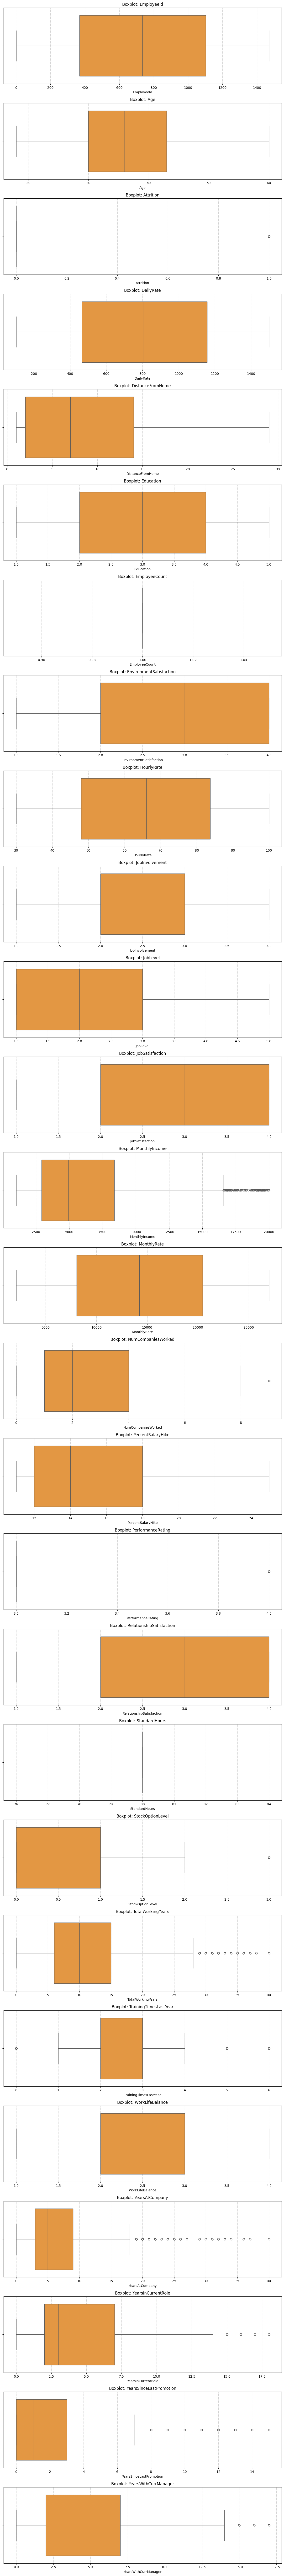

In [ ]:
plot_numeric_boxplots(df_employee)

## **3. Exploratory Data Analysis**

In [ ]:
df_employee_eda = df_employee.copy()

In [ ]:
df_employee_eda.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
df_employee_eda.select_dtypes(include=['int', 'float']).columns

Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_employee_eda.select_dtypes(include='float').columns

Index(['Attrition'], dtype='object')

In [ ]:
# Daftar kolom sesuai kategori
pure_numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

### **3.1. Univariate Analysis**

In [ ]:
def plot_kategori(df, feature, warna='purple'):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna untuk bar chart (default = 'orange').
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    count.plot(kind='bar', title=feature, color=warna)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [82]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(12, 25), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

In [ ]:
def plot_histogram(df, x, hue='Attrition', bins=20):
    """
    Menampilkan histogram variabel numerik dengan pewarnaan berdasarkan kategori hue.

    Parameters:
    df (DataFrame): DataFrame yang berisi data
    x (str): Nama kolom numerik yang ingin diplot di sumbu x
    hue (str): Nama kolom kategori untuk membedakan warna (default: 'Attrition')
    bins (int): Jumlah bin untuk histogram (default: 20)
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=x, hue=hue, multiple='stack', kde=True, bins=bins)
    plt.title(f'{hue} vs {x}')
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pie_chart(df, x, hue):
    """
    Menampilkan ringkasan dan visualisasi pie chart berdasarkan nilai unik dari kolom x,
    dengan distribusi kategori berdasarkan kolom hue.

    Parameters:
    df (DataFrame): Dataset
    x (str): Kolom kategorikal utama (misalnya Gender, Department, dsb)
    hue (str): Kolom kategorikal kedua untuk dibandingkan (misalnya Attrition)
    """
    unique_vals = df[x].unique()
    n = len(unique_vals)
    rows = (n + 2) // 3  # Maksimum 3 pie chart per baris

    for val in unique_vals:
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        total = counts.sum()
        percentages = (counts / total * 100).round(1)

        # Tampilkan ringkasan tabel
        summary_df = pd.DataFrame({
            'Jumlah Sampel': counts,
            'Persentase (%)': percentages
        })
        print(f"\nRingkasan untuk {x} = {val}")
        print(summary_df)

    print("\nVisualisasi:")

    # Pie chart
    plt.figure(figsize=(16, 5 * rows))
    for i, val in enumerate(unique_vals, 1):
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        percentages = (counts / counts.sum() * 100).round(1)

        plt.subplot(rows, 3, i)
        plt.pie(counts, labels=[f"{idx} ({p}%)" for idx, p in percentages.items()],
                autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribusi {x} - {val} berdasarkan {hue}')

    plt.tight_layout()
    plt.show()

In [84]:
def plot_kategori_bivariate(df, x, hue='Attrition', colors=None):
    """
    Menampilkan jumlah dan persentase kategori serta stacked bar chart dengan hue dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    x (str): Nama kolom kategorikal utama.
    hue (str): Nama kolom kategorikal kedua (default = 'Attrition').
    colors (list): Daftar warna untuk setiap kategori hue.
    """
    # Crosstab
    crosstab = pd.crosstab(df[x], df[hue])
    percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Tampilkan ringkasan
    print(f"\nRingkasan untuk kolom: {x}")
    summary_df = pd.concat([
        crosstab.rename(columns=lambda val: f"Jumlah {hue}={val}"),
        percent.rename(columns=lambda val: f"Persentase {hue}={val} (%)").round(1)
    ], axis=1)
    print(summary_df)

    print("\nVisualisasi:")

    # Plot stacked bar chart
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
    plt.title(f"Distribusi {x} berdasarkan {hue}")
    plt.ylabel("Jumlah")
    plt.xlabel(x)
    plt.xticks(rotation=45)
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

#### Distribusi Attrition


Ringkasan untuk kolom: Attrition
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  879            83.1
1.0                  179            16.9


Visualisasi:


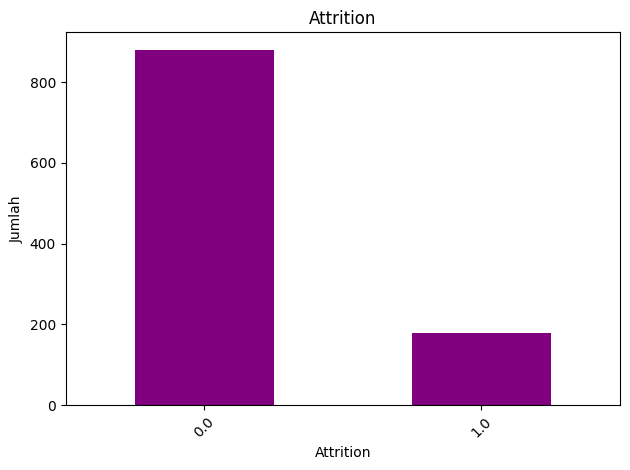

In [ ]:
plot_kategori(df_employee_eda, 'Attrition')

#### Distribusi Semua Fitur Numerik

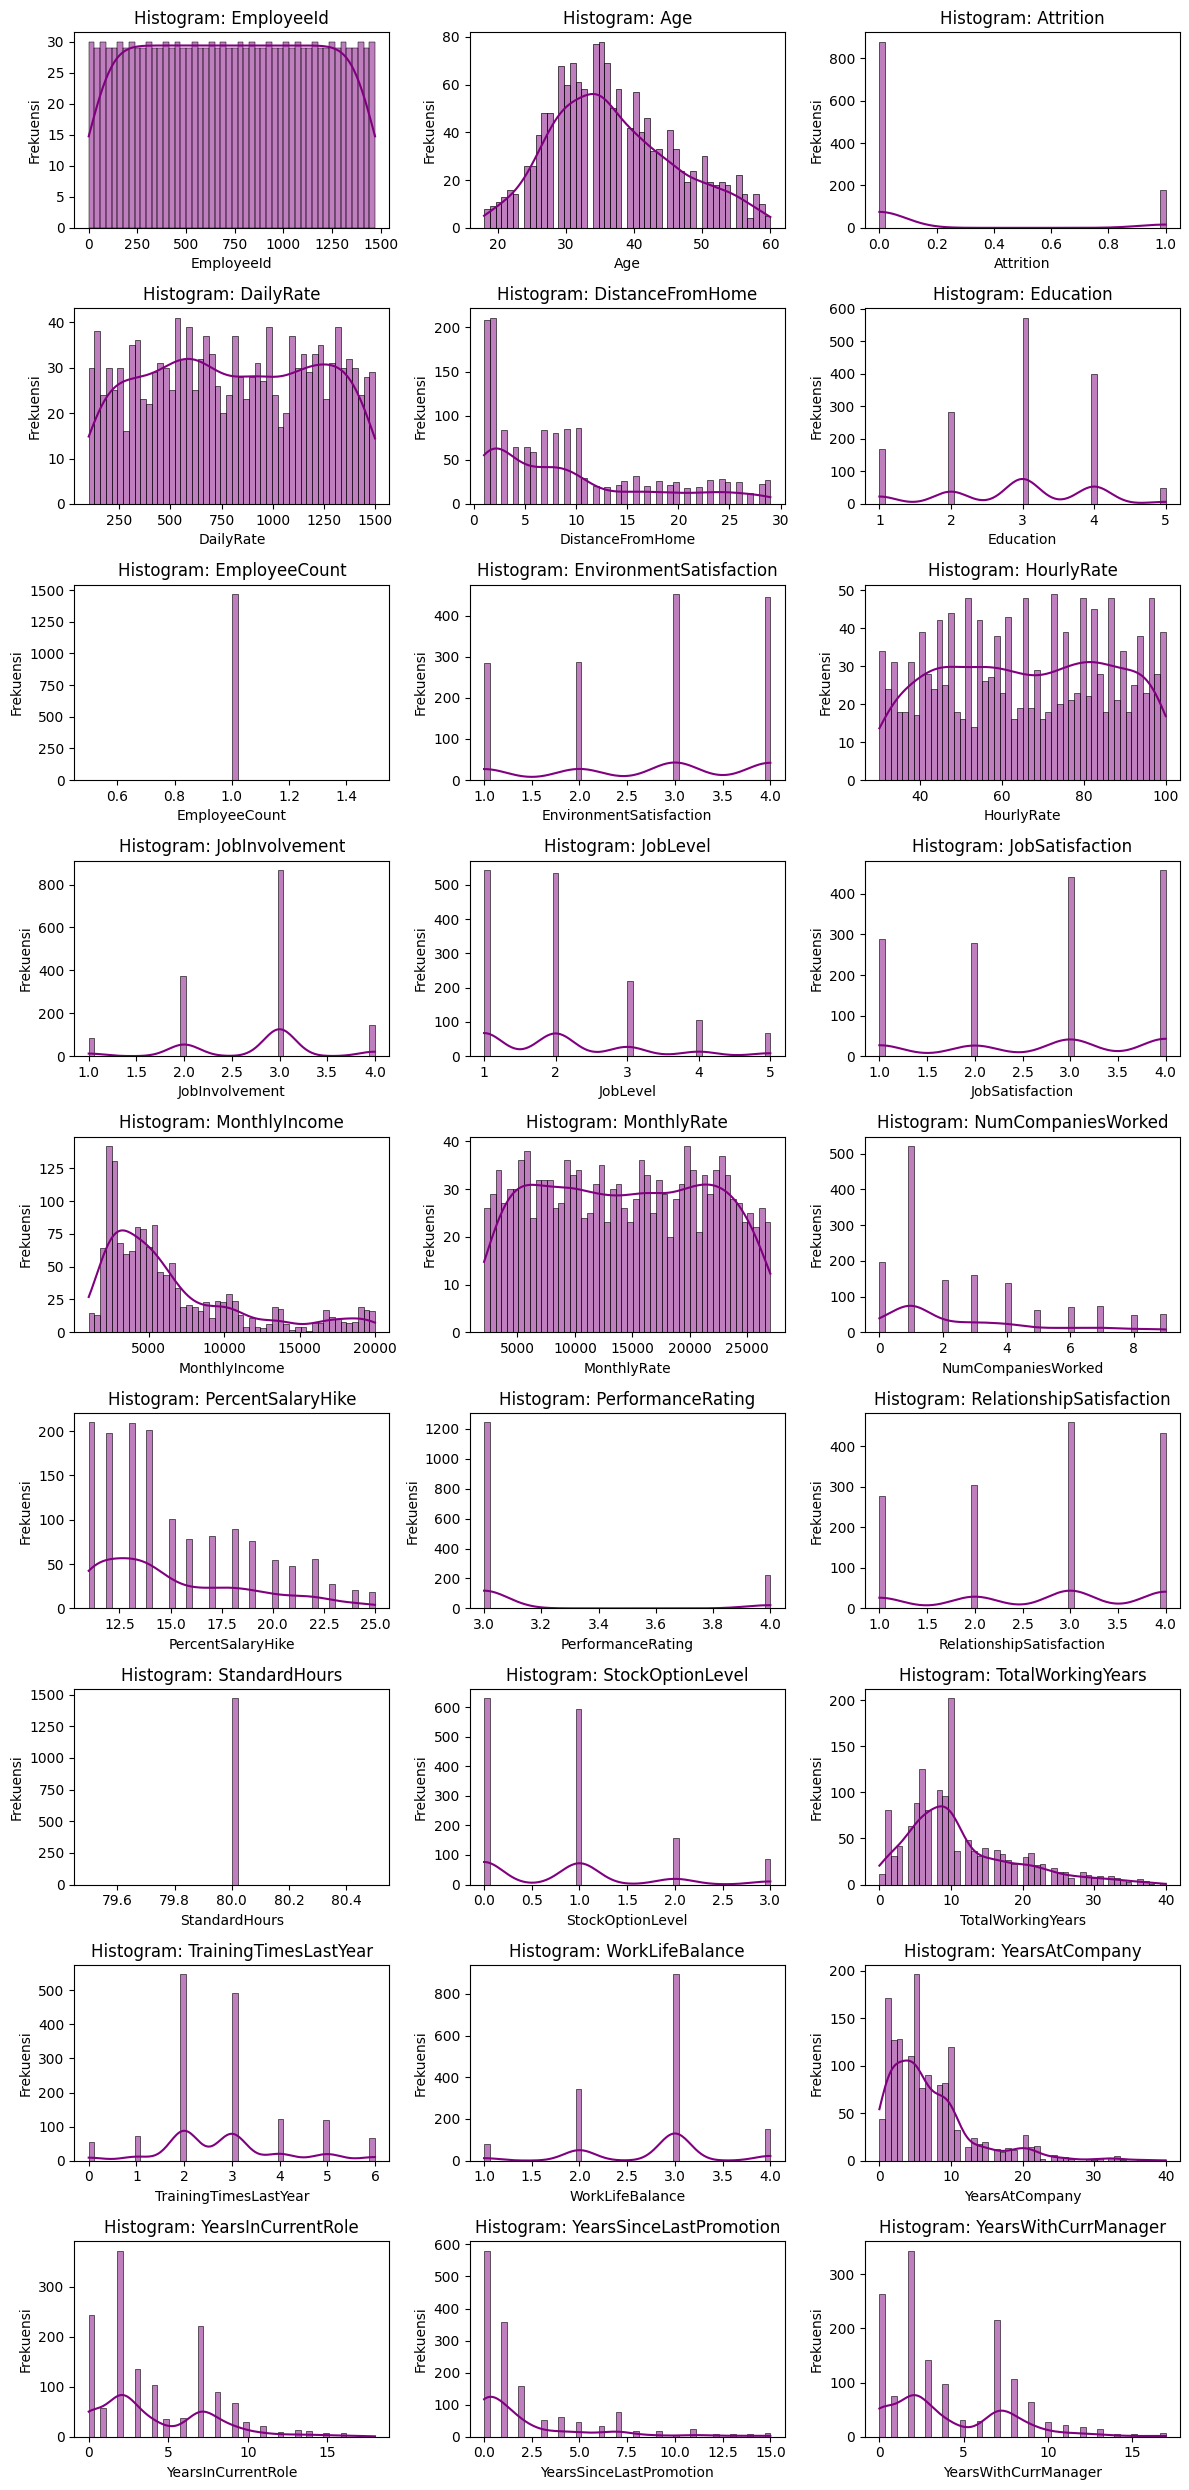

In [83]:
plot_histogram_semua_kolom(df_employee_eda)

### 3.1.2. Bivariate Analysis

#### Analisis Umur, Jenis Kelamin, dan Status Pernikahan

##### Age

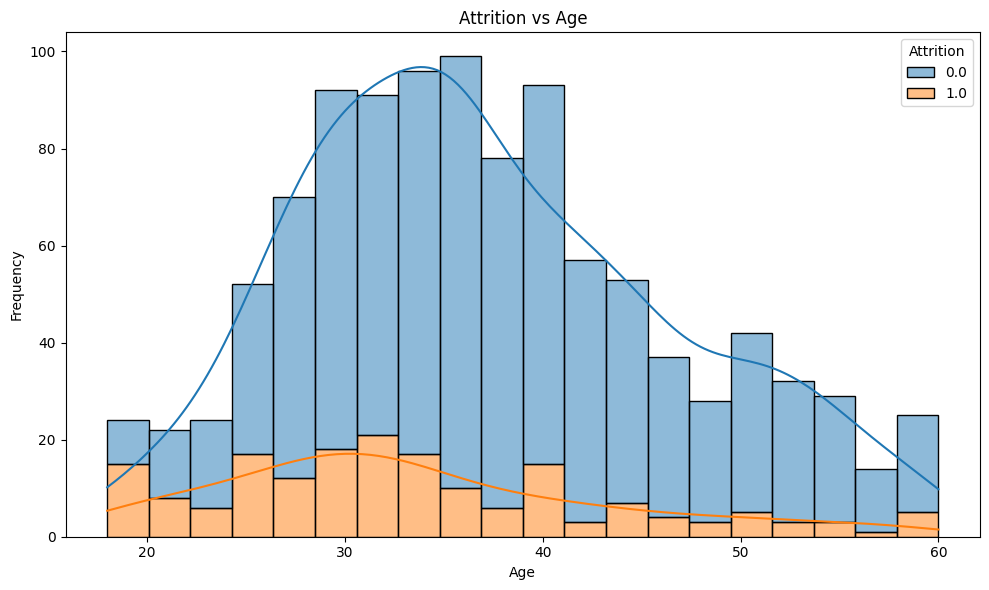

In [ ]:
plot_histogram(df_employee_eda, x='Age', hue='Attrition')

##### Gender


Ringkasan untuk Gender = Male
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  512            82.6
1.0                  108            17.4

Ringkasan untuk Gender = Female
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  367            83.8
1.0                   71            16.2

Visualisasi:


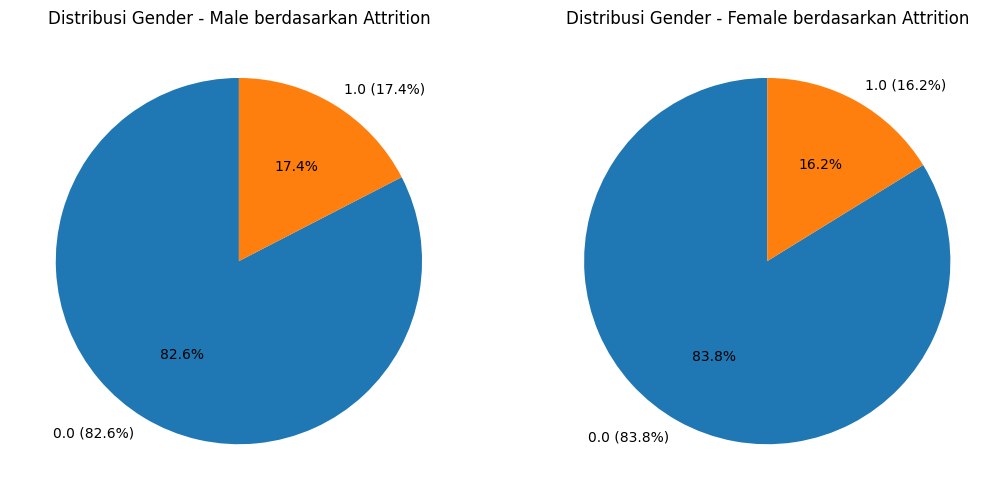

In [ ]:
plot_pie_chart(df_employee_eda, x='Gender', hue='Attrition')

##### MaritalStatus


Ringkasan untuk MaritalStatus = Married
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  402            86.6
1.0                   62            13.4

Ringkasan untuk MaritalStatus = Single
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  258            73.3
1.0                   94            26.7

Ringkasan untuk MaritalStatus = Divorced
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  219            90.5
1.0                   23             9.5

Visualisasi:


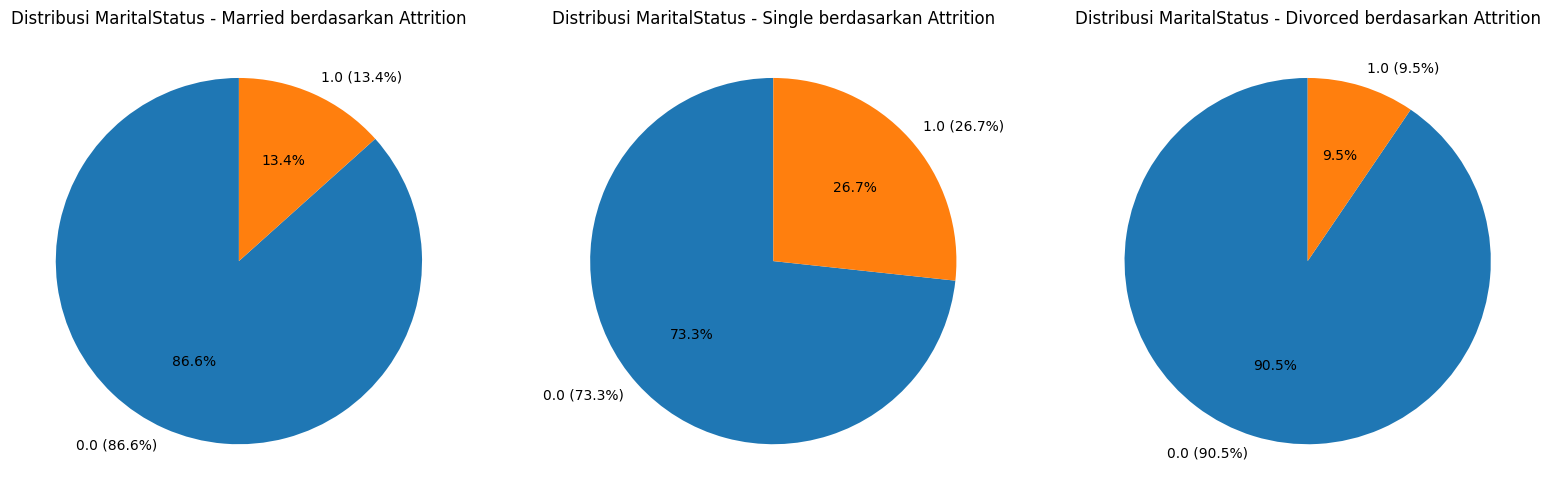

In [ ]:
plot_pie_chart(df_employee_eda, x='MaritalStatus', hue='Attrition')

#### Analisis Department, JobRole, dan BusinessTravel

##### Department


Ringkasan untuk kolom: Department
Attrition               Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
Department                                                           
Human Resources                           32                     6   
Research & Development                   594                   107   
Sales                                    253                    66   

Attrition               Persentase Attrition=0.0 (%)  \
Department                                             
Human Resources                                 84.2   
Research & Development                          84.7   
Sales                                           79.3   

Attrition               Persentase Attrition=1.0 (%)  
Department                                            
Human Resources                                 15.8  
Research & Development                          15.3  
Sales                                           20.7  

Visualisasi:


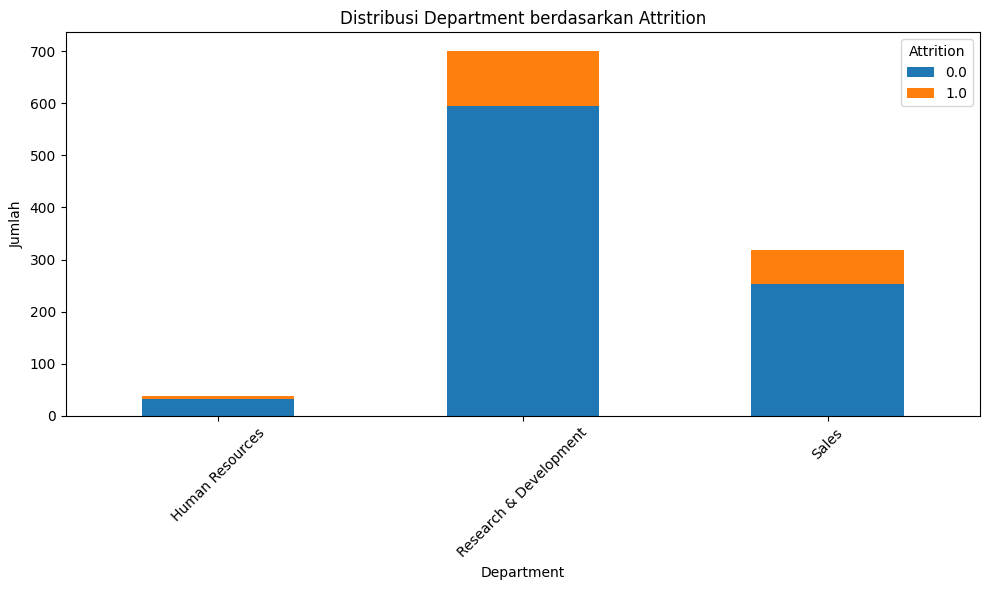

In [85]:
plot_kategori_bivariate(df_employee_eda, x='Department', hue='Attrition')

##### JobRole


Ringkasan untuk kolom: JobRole
Attrition                  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
JobRole                                                                 
Healthcare Representative                    80                     8   
Human Resources                              24                     6   
Laboratory Technician                       139                    49   
Manager                                      74                     5   
Manufacturing Director                      100                     7   
Research Director                            60                     2   
Research Scientist                          176                    38   
Sales Executive                             193                    39   
Sales Representative                         33                    25   

Attrition                  Persentase Attrition=0.0 (%)  \
JobRole                                                   
Healthcare Representative                     

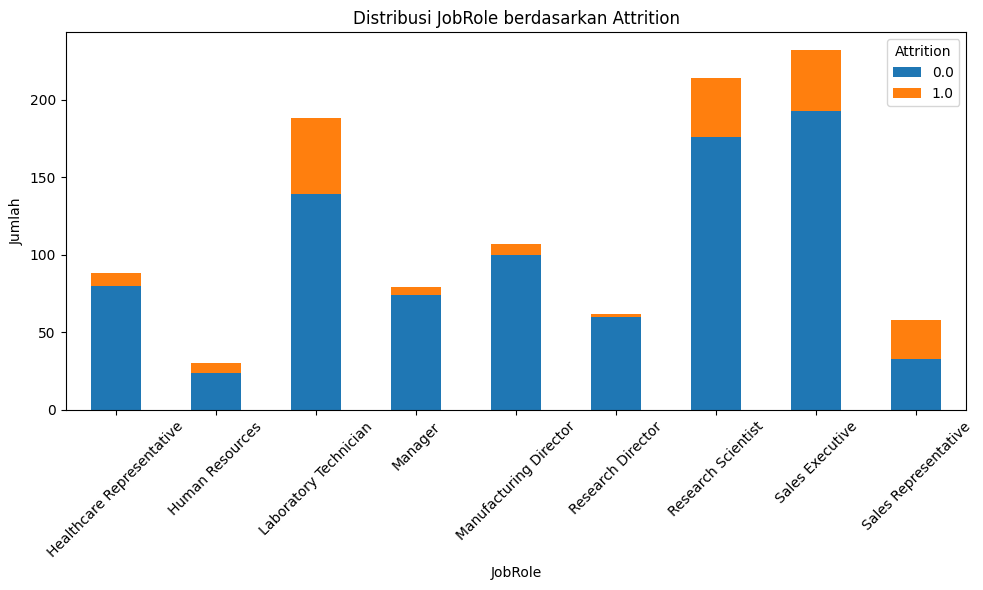

In [86]:
plot_kategori_bivariate(df_employee_eda, x='JobRole', hue='Attrition')

##### BusinessTravel


Ringkasan untuk kolom: BusinessTravel
Attrition          Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
BusinessTravel                                                  
Non-Travel                           96                    11   
Travel_Frequently                   154                    51   
Travel_Rarely                       629                   117   

Attrition          Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
BusinessTravel                                                                 
Non-Travel                                 89.7                          10.3  
Travel_Frequently                          75.1                          24.9  
Travel_Rarely                              84.3                          15.7  

Visualisasi:


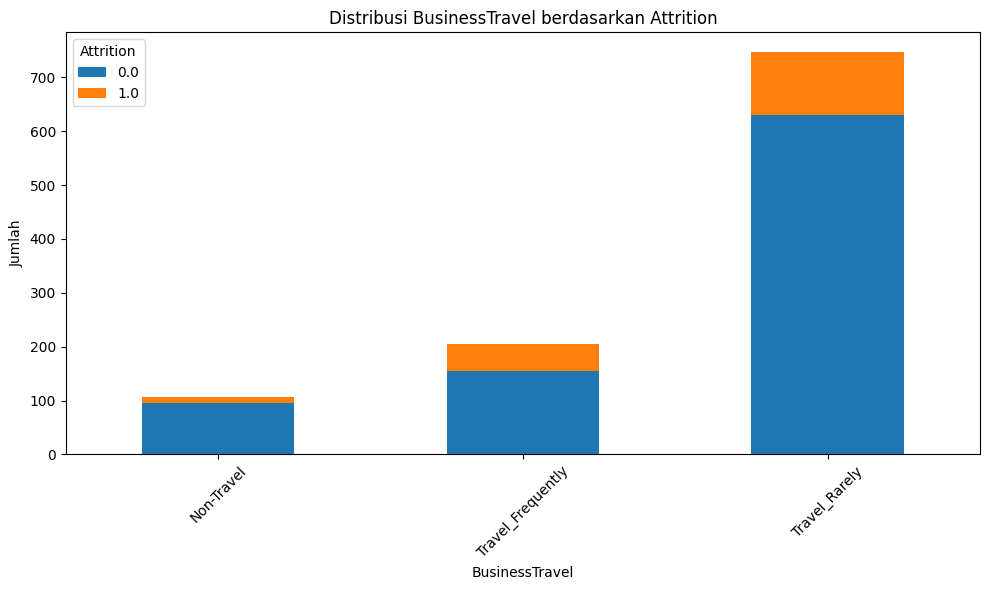

In [87]:
plot_kategori_bivariate(df_employee_eda, x='BusinessTravel', hue='Attrition')

#### Analisis OverTime, WorkLifeBalance, dan JobSatisfaction

##### OverTime


Ringkasan untuk OverTime = Yes
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  209            68.1
1.0                   98            31.9

Ringkasan untuk OverTime = No
           Jumlah Sampel  Persentase (%)
Attrition                               
0.0                  670            89.2
1.0                   81            10.8

Visualisasi:


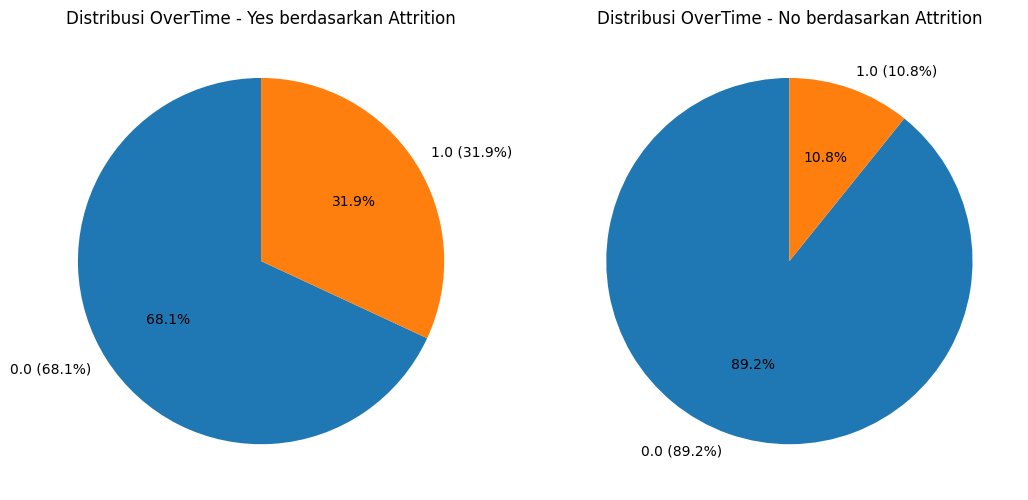

In [ ]:
plot_pie_chart(df_employee_eda, x='OverTime', hue='Attrition')

##### WorkLifeBalance


Ringkasan untuk kolom: WorkLifeBalance
Attrition        Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
WorkLifeBalance                                               
1                                  38                    18   
2                                 206                    45   
3                                 544                    94   
4                                  91                    22   

Attrition        Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
WorkLifeBalance                                                              
1                                        67.9                          32.1  
2                                        82.1                          17.9  
3                                        85.3                          14.7  
4                                        80.5                          19.5  

Visualisasi:


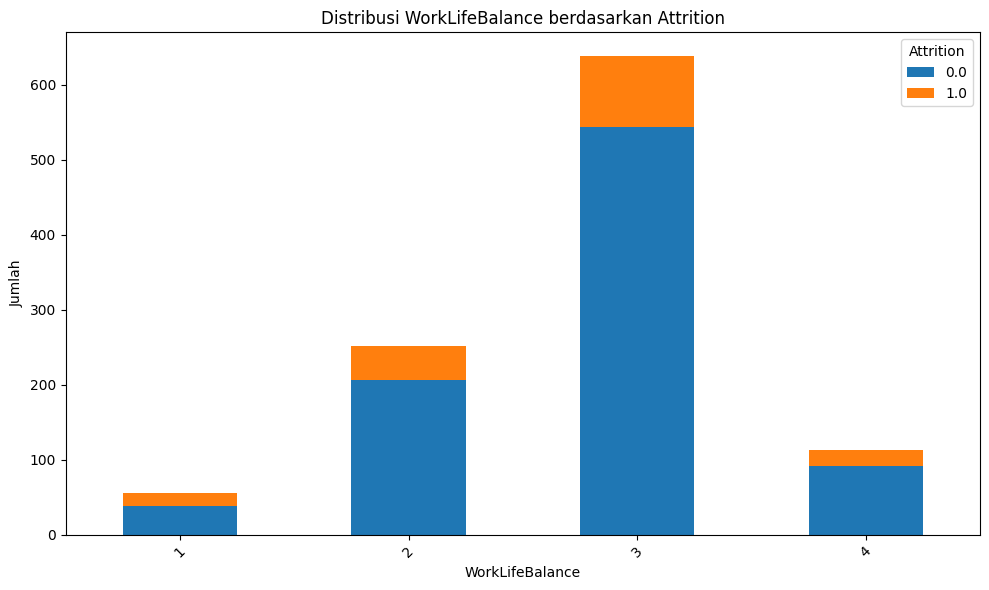

In [88]:
plot_kategori_bivariate(df_employee_eda, x='WorkLifeBalance', hue='Attrition')

##### JobSatisfaction


Ringkasan untuk kolom: JobSatisfaction
Attrition        Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
JobSatisfaction                                               
1                                 159                    46   
2                                 163                    32   
3                                 256                    62   
4                                 301                    39   

Attrition        Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
JobSatisfaction                                                              
1                                        77.6                          22.4  
2                                        83.6                          16.4  
3                                        80.5                          19.5  
4                                        88.5                          11.5  

Visualisasi:


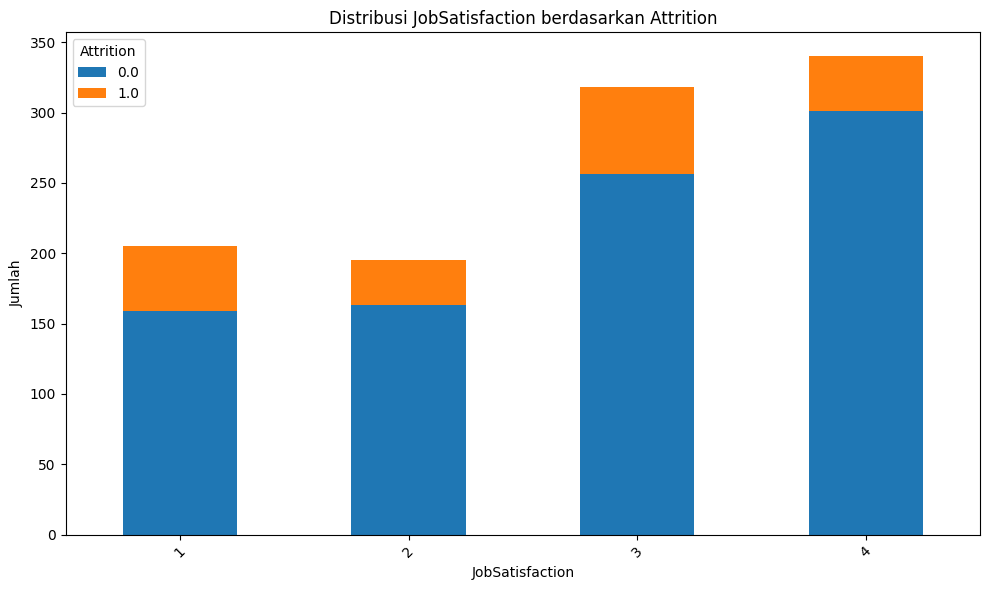

In [89]:
plot_kategori_bivariate(df_employee_eda, x='JobSatisfaction', hue='Attrition')

#### Analisis YearsAtCompany dan NumCompaniesWorked

##### YearsAtCompany


Ringkasan untuk kolom: YearsAtCompany
Attrition       Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
YearsAtCompany                                               
0                                 20                    11   
1                                 84                    44   
2                                 69                    19   
3                                 80                    18   
4                                 61                    14   
5                                118                    15   
6                                 49                     8   
7                                 55                     9   
8                                 57                     8   
9                                 55                     5   
10                                66                    13   
11                                22                     1   
12                                11                     0   
13                             

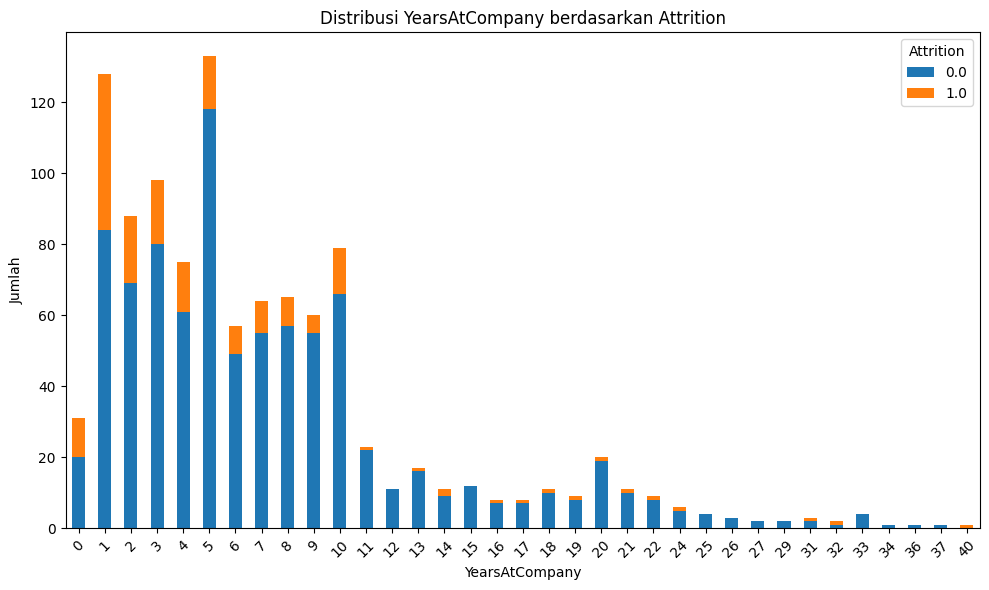

In [90]:
plot_kategori_bivariate(df_employee_eda, x='YearsAtCompany', hue='Attrition')

##### NumCompaniesWorked


Ringkasan untuk kolom: NumCompaniesWorked
Attrition           Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
NumCompaniesWorked                                               
0                                    128                    19   
1                                    297                    74   
2                                     88                    12   
3                                    105                    11   
4                                     85                    12   
5                                     35                    13   
6                                     39                    11   
7                                     45                    13   
8                                     23                     5   
9                                     34                     9   

Attrition           Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
NumCompaniesWorked                                                              
0 

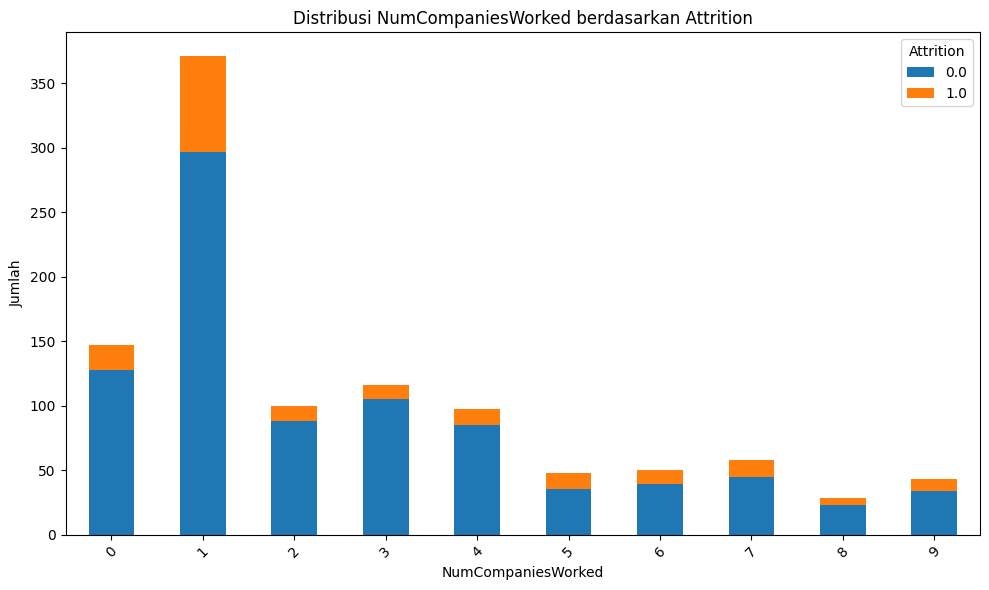

In [91]:
plot_kategori_bivariate(df_employee_eda, x='NumCompaniesWorked', hue='Attrition')

## **4. Data Preparation**

### 4.1. Menghapus Missing Values

# Univariate Analysis

#### Categorical Features

In [ ]:
ordinal_categorical_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'WorkLifeBalance'
]


Ringkasan untuk kolom: BusinessTravel
Attrition          Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
BusinessTravel                                                  
Non-Travel                           96                    11   
Travel_Frequently                   154                    51   
Travel_Rarely                       629                   117   

Attrition          Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
BusinessTravel                                                                 
Non-Travel                                 89.7                          10.3  
Travel_Frequently                          75.1                          24.9  
Travel_Rarely                              84.3                          15.7  

Visualisasi:


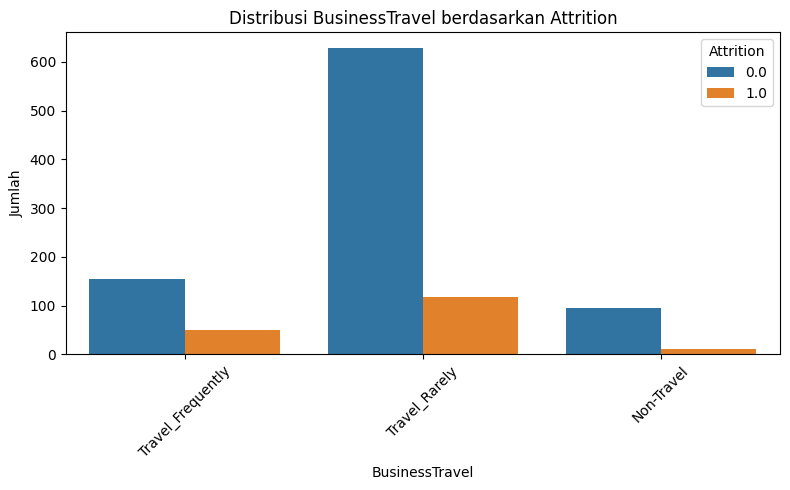

In [ ]:
plot_kategori(df_employee_eda, 'BusinessTravel')


Ringkasan untuk kolom: Department
Attrition               Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
Department                                                           
Human Resources                           32                     6   
Research & Development                   594                   107   
Sales                                    253                    66   

Attrition               Persentase Attrition=0.0 (%)  \
Department                                             
Human Resources                                 84.2   
Research & Development                          84.7   
Sales                                           79.3   

Attrition               Persentase Attrition=1.0 (%)  
Department                                            
Human Resources                                 15.8  
Research & Development                          15.3  
Sales                                           20.7  

Visualisasi:


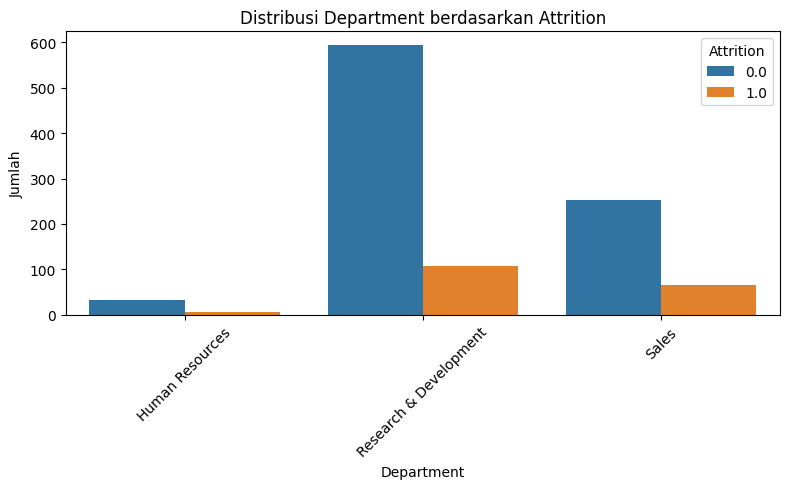

In [ ]:
plot_kategori(df_employee_eda, 'Department')


Ringkasan untuk kolom: EducationField
Attrition         Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
EducationField                                                 
Human Resources                     13                     2   
Life Sciences                      366                    70   
Marketing                           96                    26   
Medical                            284                    46   
Other                               49                    10   
Technical Degree                    71                    25   

Attrition         Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
EducationField                                                                
Human Resources                           86.7                          13.3  
Life Sciences                             83.9                          16.1  
Marketing                                 78.7                          21.3  
Medical                                   86.1       

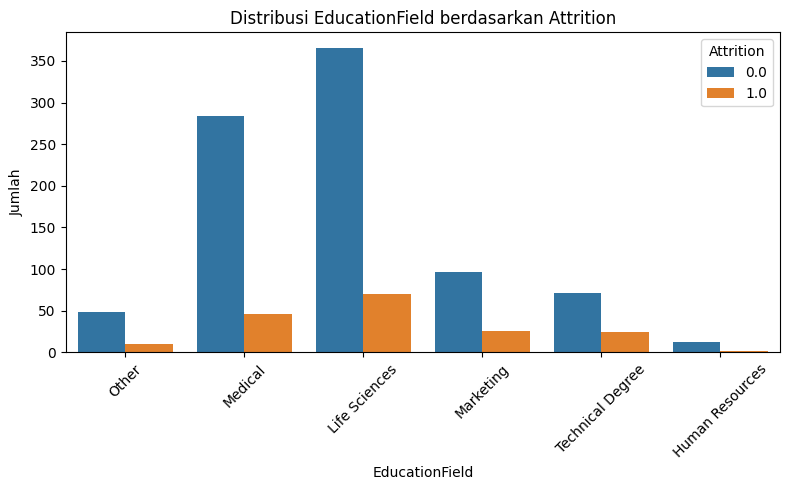

In [ ]:
plot_kategori(df_employee_eda, 'EducationField')


Ringkasan untuk kolom: Gender
Attrition  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
Gender                                                  
Female                      367                    71   
Male                        512                   108   

Attrition  Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
Gender                                                                 
Female                             83.8                          16.2  
Male                               82.6                          17.4  

Visualisasi:


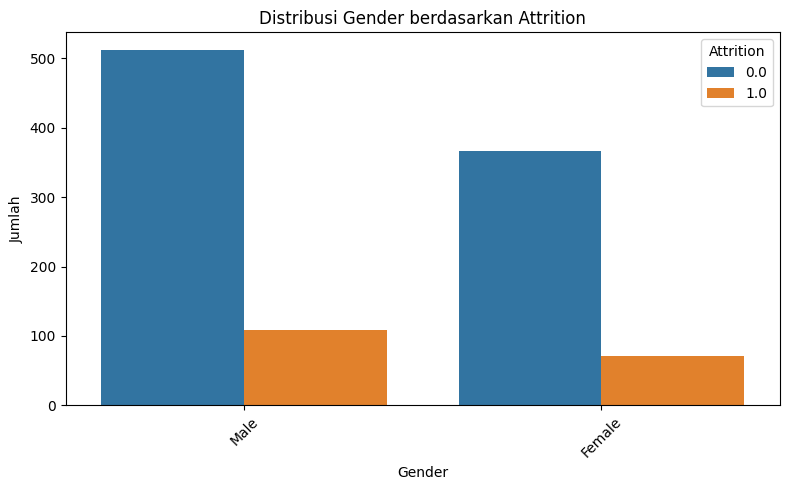

In [ ]:
plot_kategori(df_employee_eda, 'Gender')


Ringkasan untuk kolom: JobRole
Attrition                  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
JobRole                                                                 
Healthcare Representative                    80                     8   
Human Resources                              24                     6   
Laboratory Technician                       139                    49   
Manager                                      74                     5   
Manufacturing Director                      100                     7   
Research Director                            60                     2   
Research Scientist                          176                    38   
Sales Executive                             193                    39   
Sales Representative                         33                    25   

Attrition                  Persentase Attrition=0.0 (%)  \
JobRole                                                   
Healthcare Representative                     

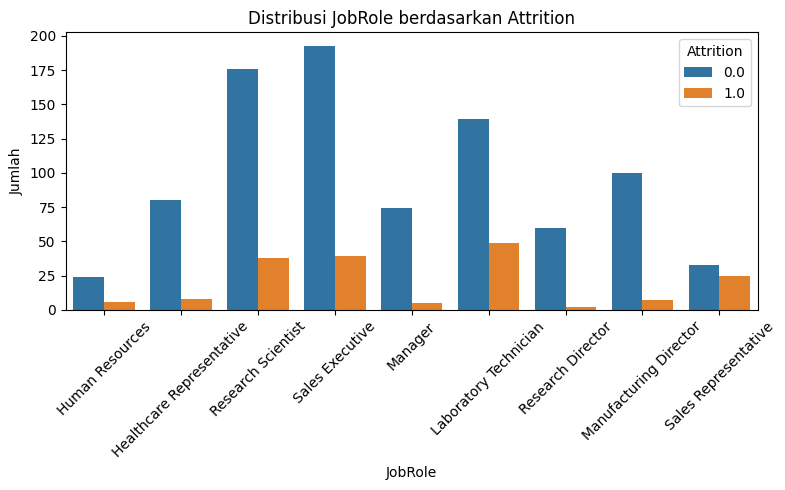

In [ ]:
plot_kategori(df_employee_eda, 'JobRole')


Ringkasan untuk kolom: MaritalStatus
Attrition      Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
MaritalStatus                                               
Divorced                        219                    23   
Married                         402                    62   
Single                          258                    94   

Attrition      Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
MaritalStatus                                                              
Divorced                               90.5                           9.5  
Married                                86.6                          13.4  
Single                                 73.3                          26.7  

Visualisasi:


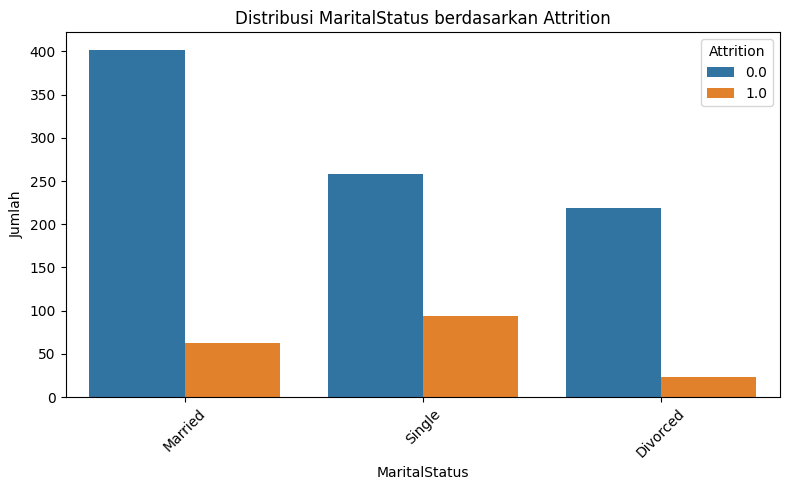

In [ ]:
plot_kategori(df_employee_eda, 'MaritalStatus')


Ringkasan untuk kolom: Over18
Attrition  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
Over18                                                  
Y                           879                   179   

Attrition  Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
Over18                                                                 
Y                                  83.1                          16.9  

Visualisasi:


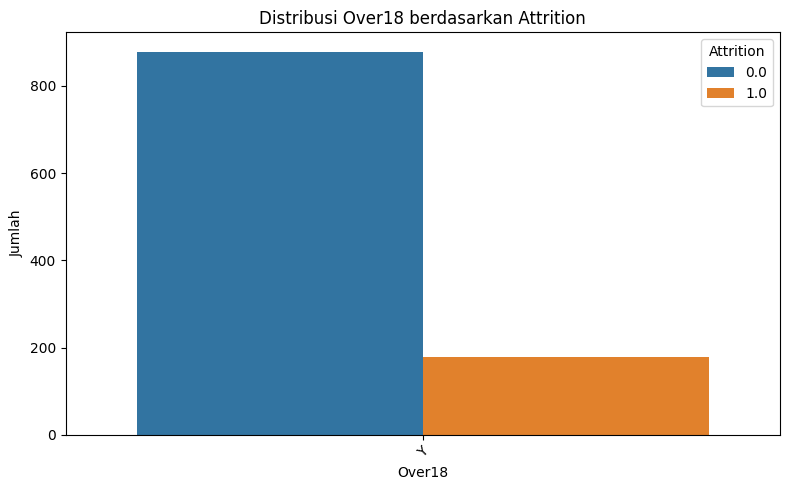

In [ ]:
plot_kategori(df_employee_eda, 'Over18')


Ringkasan untuk kolom: OverTime
Attrition  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
OverTime                                                
No                          670                    81   
Yes                         209                    98   

Attrition  Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
OverTime                                                               
No                                 89.2                          10.8  
Yes                                68.1                          31.9  

Visualisasi:


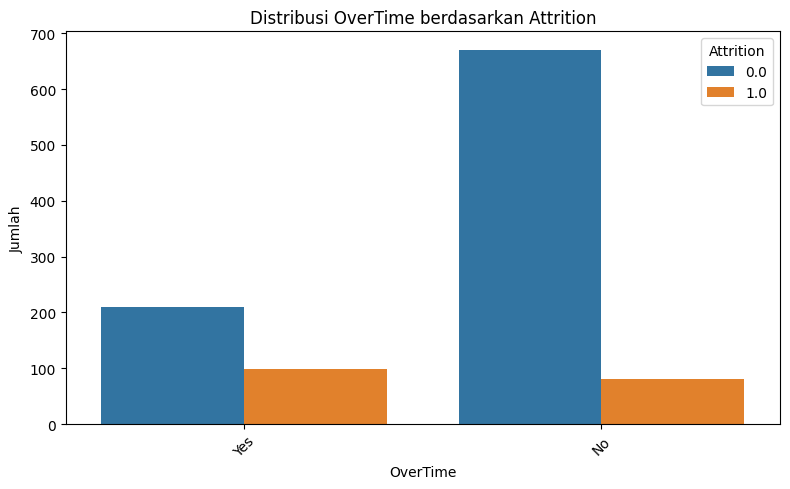

In [ ]:
plot_kategori(df_employee_eda, 'OverTime')


Ringkasan untuk kolom: Education
Attrition  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
Education                                               
1                           105                    26   
2                           177                    31   
3                           334                    76   
4                           232                    44   
5                            31                     2   

Attrition  Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
Education                                                              
1                                  80.2                          19.8  
2                                  85.1                          14.9  
3                                  81.5                          18.5  
4                                  84.1                          15.9  
5                                  93.9                           6.1  

Visualisasi:


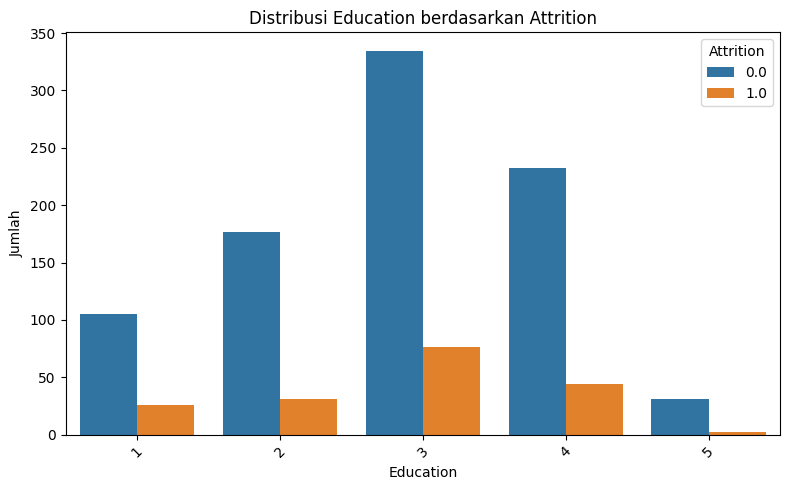

In [ ]:
plot_kategori(df_employee_eda, 'Education')


Ringkasan untuk kolom: EnvironmentSatisfaction
Attrition                Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
EnvironmentSatisfaction                                               
1                                         152                    57   
2                                         165                    35   
3                                         288                    47   
4                                         274                    40   

Attrition                Persentase Attrition=0.0 (%)  \
EnvironmentSatisfaction                                 
1                                                72.7   
2                                                82.5   
3                                                86.0   
4                                                87.3   

Attrition                Persentase Attrition=1.0 (%)  
EnvironmentSatisfaction                                
1                                                27.3  
2             

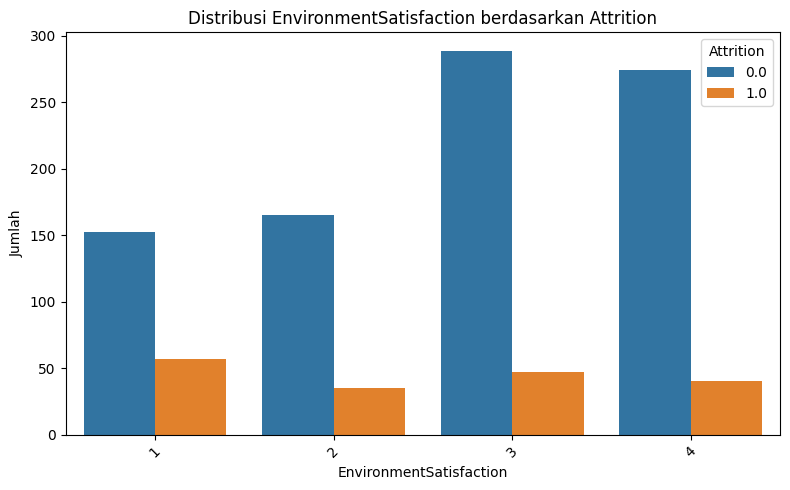

In [ ]:
plot_kategori(df_employee_eda, 'EnvironmentSatisfaction')


Ringkasan untuk kolom: JobInvolvement
Attrition       Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
JobInvolvement                                               
1                                 33                    22   
2                                218                    55   
3                                533                    92   
4                                 95                    10   

Attrition       Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
JobInvolvement                                                              
1                                       60.0                          40.0  
2                                       79.9                          20.1  
3                                       85.3                          14.7  
4                                       90.5                           9.5  

Visualisasi:


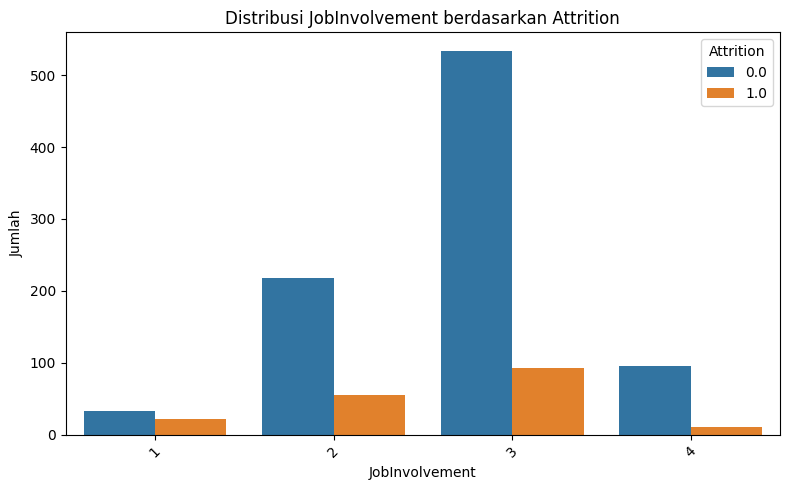

In [ ]:
plot_kategori(df_employee_eda, 'JobInvolvement')


Ringkasan untuk kolom: JobLevel
Attrition  Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
JobLevel                                                
1                           286                   108   
2                           327                    37   
3                           140                    25   
4                            76                     4   
5                            50                     5   

Attrition  Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
JobLevel                                                               
1                                  72.6                          27.4  
2                                  89.8                          10.2  
3                                  84.8                          15.2  
4                                  95.0                           5.0  
5                                  90.9                           9.1  

Visualisasi:


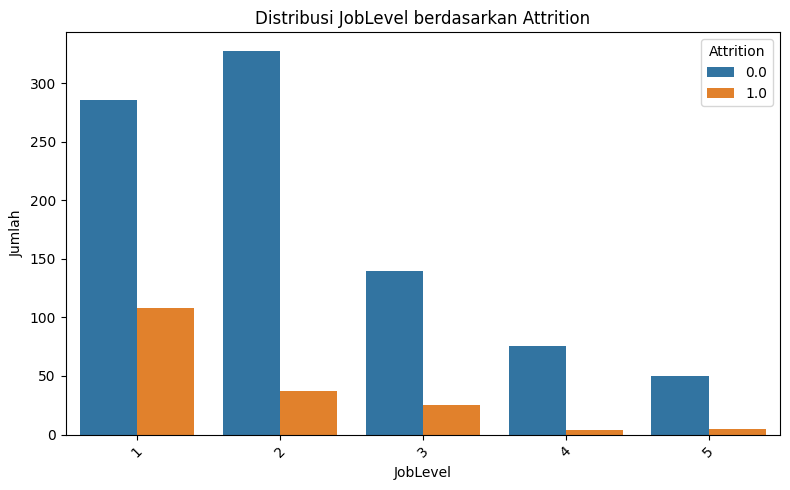

In [ ]:
plot_kategori(df_employee_eda, 'JobLevel')


Ringkasan untuk kolom: JobSatisfaction
Attrition        Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
JobSatisfaction                                               
1                                 159                    46   
2                                 163                    32   
3                                 256                    62   
4                                 301                    39   

Attrition        Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
JobSatisfaction                                                              
1                                        77.6                          22.4  
2                                        83.6                          16.4  
3                                        80.5                          19.5  
4                                        88.5                          11.5  

Visualisasi:


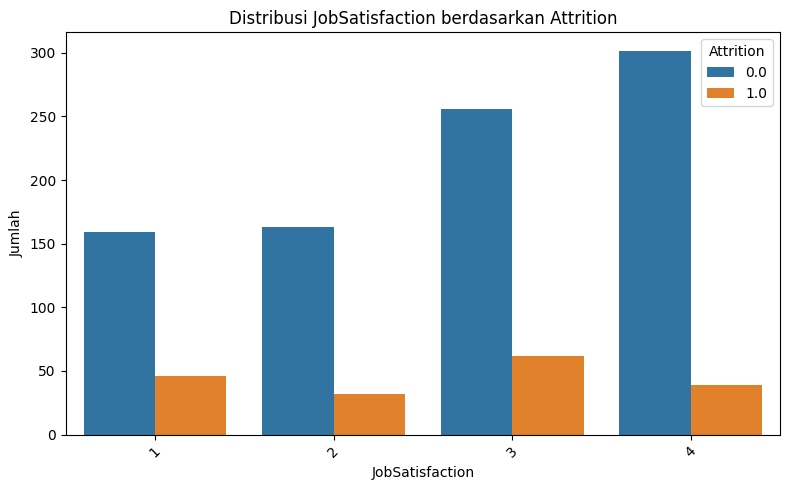

In [ ]:
plot_kategori(df_employee_eda, 'JobSatisfaction')


Ringkasan untuk kolom: PerformanceRating
Attrition          Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
PerformanceRating                                               
3                                   748                   151   
4                                   131                    28   

Attrition          Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
PerformanceRating                                                              
3                                          83.2                          16.8  
4                                          82.4                          17.6  

Visualisasi:


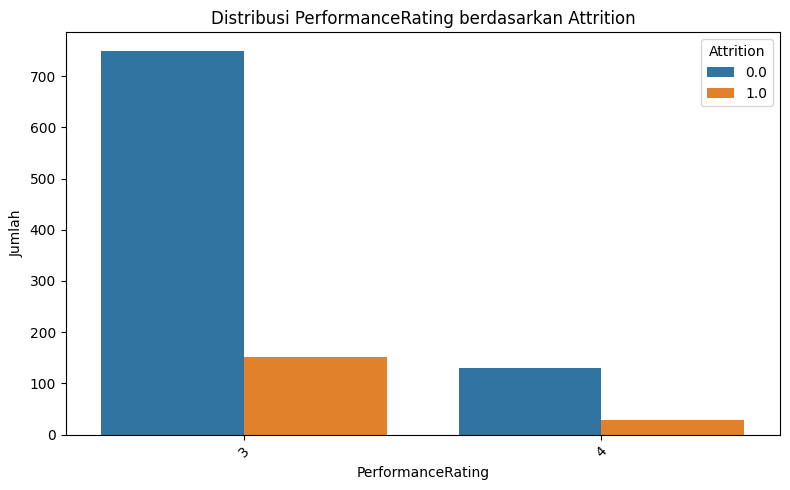

In [ ]:
plot_kategori(df_employee_eda, 'PerformanceRating')


Ringkasan untuk kolom: RelationshipSatisfaction
Attrition                 Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
RelationshipSatisfaction                                               
1                                          155                    46   
2                                          178                    32   
3                                          275                    49   
4                                          271                    52   

Attrition                 Persentase Attrition=0.0 (%)  \
RelationshipSatisfaction                                 
1                                                 77.1   
2                                                 84.8   
3                                                 84.9   
4                                                 83.9   

Attrition                 Persentase Attrition=1.0 (%)  
RelationshipSatisfaction                                
1                                                 22.9 

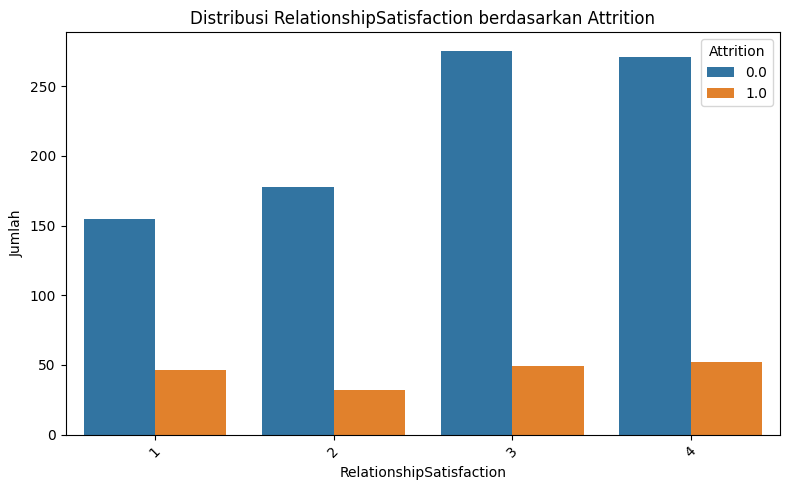

In [ ]:
plot_kategori(df_employee_eda, 'RelationshipSatisfaction')


Ringkasan untuk kolom: StockOptionLevel
Attrition         Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
StockOptionLevel                                               
0                                  350                   121   
1                                  380                    42   
2                                  102                     8   
3                                   47                     8   

Attrition         Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
StockOptionLevel                                                              
0                                         74.3                          25.7  
1                                         90.0                          10.0  
2                                         92.7                           7.3  
3                                         85.5                          14.5  

Visualisasi:


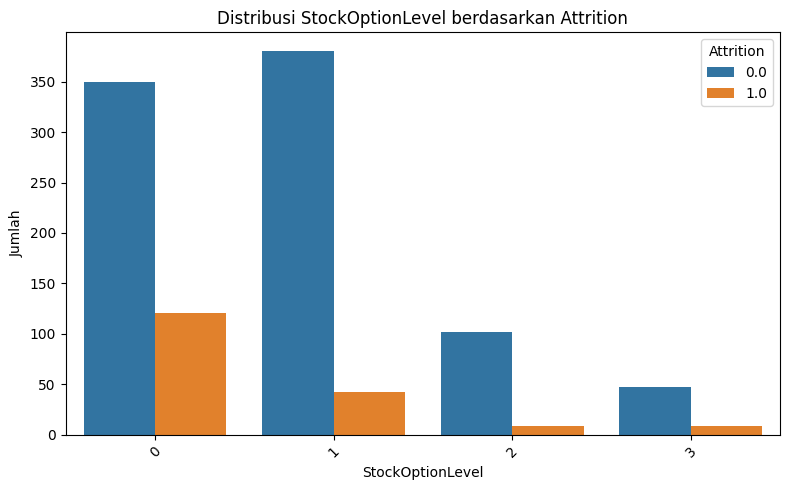

In [ ]:
plot_kategori(df_employee_eda, 'StockOptionLevel')


Ringkasan untuk kolom: WorkLifeBalance
Attrition        Jumlah Attrition=0.0  Jumlah Attrition=1.0  \
WorkLifeBalance                                               
1                                  38                    18   
2                                 206                    45   
3                                 544                    94   
4                                  91                    22   

Attrition        Persentase Attrition=0.0 (%)  Persentase Attrition=1.0 (%)  
WorkLifeBalance                                                              
1                                        67.9                          32.1  
2                                        82.1                          17.9  
3                                        85.3                          14.7  
4                                        80.5                          19.5  

Visualisasi:


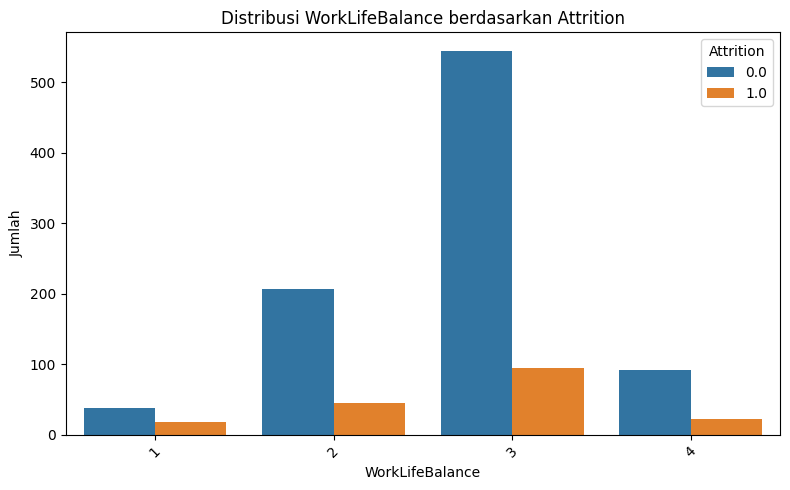

In [ ]:
plot_kategori(df_employee_eda, 'WorkLifeBalance')